### Purpose : To build a Batch Gradient Descent optimization algorithm



In [20]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib.animation import FuncAnimation 
from IPython import display
from IPython.display import HTML
import matplotlib.animation as animation


I will try to build a Batch gradient descent optimization algorithm class from scratch and side by side run it on a dataset named - 'Student's performance'. The problem I will be working on is a supervised machine learning regression based problem.

This dataset has 10000 rows and (5+1) columns. Predictors = 5, and Label =1.

I will try to calculate the optimized parametric values for this given dataset, and also compare it with the sklearn module LinearRegression class.

After that, I will try to plot some graphs which will give a better intuition about how my model is performing with increasing epochs.

In [2]:
# loading the dataset

df = pd.read_csv(r'C:\Users\nilay\OneDrive\Desktop\Dataset\4. Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df.shape

(10000, 6)

In [4]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [5]:
# Duplicate makes sense in this dataset. So I will prefer not remove them
df.duplicated().sum()

127

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
df['Hours Studied'] = df['Hours Studied'].astype('int16')
df['Previous Scores'] = df['Previous Scores'].astype('int16')
df['Extracurricular Activities'] = df['Extracurricular Activities'].str.replace('Yes','1')
df['Extracurricular Activities'] = df['Extracurricular Activities'].str.replace('No','0')
df['Extracurricular Activities'] = df['Extracurricular Activities'].astype('int8')
df['Sleep Hours'] = df['Sleep Hours'].astype('int8')
df['Sample Question Papers Practiced'] = df['Sample Question Papers Practiced'].astype('int8')
df['Performance Index'] = df['Performance Index'].astype('int32')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     10000 non-null  int16
 1   Previous Scores                   10000 non-null  int16
 2   Extracurricular Activities        10000 non-null  int8 
 3   Sleep Hours                       10000 non-null  int8 
 4   Sample Question Papers Practiced  10000 non-null  int8 
 5   Performance Index                 10000 non-null  int32
dtypes: int16(2), int32(1), int8(3)
memory usage: 107.6 KB


In [9]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [10]:
# splitting my Input feature(X) and output label(y)
X = df.drop(columns='Performance Index')
y=df['Performance Index']

In [11]:
# applying Min_max_scaler to our Input features(X)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.75      , 1.        , 1.        , 1.        , 0.11111111],
       [0.375     , 0.71186441, 0.        , 0.        , 0.22222222],
       [0.875     , 0.18644068, 1.        , 0.6       , 0.22222222],
       ...,
       [0.625     , 0.72881356, 1.        , 0.8       , 0.55555556],
       [1.        , 0.96610169, 1.        , 0.6       , 0.        ],
       [0.75      , 0.57627119, 0.        , 0.8       , 0.11111111]])

In [12]:
# applying train test split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
x_train.shape,x_test.shape

((8000, 5), (2000, 5))

In [13]:
# applying LinearRegression class from sklearn module - 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
print('intercept = ', lr.intercept_)
print('coefficients = ', lr.coef_)

y_pred = lr.predict(x_test)

from sklearn.metrics import r2_score
print('r2_score = ', r2_score(y_test, y_pred))

intercept =  11.438692791672047
coefficients =  [22.81531535 60.11313346  0.66530347  2.38414981  1.68989735]
r2_score =  0.9880686410711422


In [14]:
# Creating my own class

class BatchGDRegressor:
    def __init__(self, learning_rate=0.40, epochs=300):
        self.bias = None
        self.coef = None
        self.lr = learning_rate
        self.epochs = epochs
        self.loss = []
        self.c = []
        self.b1, self.b2, self.b3, self.b4, self.b5 = [],[],[],[],[]
        self.e = []
        
    def parameters(self):
        return self.bias, self.coef
    
    def real_time_params(self):
        return self.loss, self.c, self.b1, self.b2, self.b3, self.b4, self.b5, self.e
        
        
    def fit(self, x_train, y_train):
        self.bias = 0
        self.coef = np.ones(x_train.shape[1])
        
        for i in range(self.epochs):
            y_hat = self.bias + np.dot(x_train,self.coef)
            loss = np.mean(np.square(y_train-y_hat))
            c = self.bias
            b1,b2,b3,b4,b5  = [self.coef[i] for i in range(5)]
            
            slope_bias = -2 * np.mean(y_train-y_hat)
            slope_coef = np.dot((y_train-y_hat),x_train) * (-2/x_train.shape[0])
            
            self.bias = self.bias - (self.lr*slope_bias)
            self.coef = self.coef - (self.lr*slope_coef)
            
            if i % 5==0:     #...(after every 5 iteration, i will try to capture the parameters)
                self.loss.append(loss)
                self.c.append(c)
                self.b1.append(b1)
                self.b2.append(b2)
                self.b3.append(b3)
                self.b4.append(b4)
                self.b5.append(b5)
                self.e.append(i)

            
    def predict(self, x_test):
        return np.dot(x_test,self.coef) + self.bias
    
    

In [15]:
b_gd = BatchGDRegressor(learning_rate=0.40, epochs=200)
b_gd.fit(x_train,y_train)
y_pred = b_gd.predict(x_test)

bias, coef = b_gd.parameters()
print('intercept :', bias)
print('coefficients :', coef)
print('r2_score :', r2_score(y_test, y_pred))

intercept : 11.445800310057212
coefficients : [22.81242254 60.10896442  0.66448062  2.38163964  1.68682209]
r2_score : 0.9880684826638173


Result of Linear Regression class of sklearn module - 

    intercept =  11.438692791672047
    coefficients =  [22.81531535 60.11313346  0.66530347  2.38414981  1.68989735]
    r2_score =  0.9880686410711422
    
    
Result of my own created class - 

    intercept : 11.445800310057212
    coefficients : [22.81242254 60.10896442  0.66448062  2.38163964  1.68682209]
    r2_score : 0.9880684826638173

### Plotting real time graphs

In [16]:
loss, c, b1, b2, b3, b4, b5, epoch = b_gd.real_time_params()

In [25]:
# initializing a figure 
fig = plt.figure(figsize=(7,4)) 
  
# labeling the x-axis and y-axis 
axis = plt.axes(xlim=(-50, 500),  ylim=(-200, 3000)) 
plt.xlabel('Epoch')
plt.ylabel('Loss / Cost')
  
# lists storing x and y values 
x, y = [], [] 
  
line, = axis.plot(0, 0, '--', color='black') 
  
  
def animate(i): 
    line.set_xdata(epoch[:i]) 
    line.set_ydata(loss[:i]) 
    return line, 
  
  
anim = FuncAnimation(fig, animate, frames=100, interval=400) 
fig.suptitle('Cost Function with increasing epoch', fontsize=14) 

# video = anim.to_html5_video()
# html = display.HTML(video)
# display.display(html) 
# saving to m4 using ffmpeg writer 
writervideo = animation.FFMpegWriter(fps=60) 
anim.save('Batch_Gradient_Descent - Cost_Function with increasing epoch.mp4', writer=writervideo) 
plt.close() 

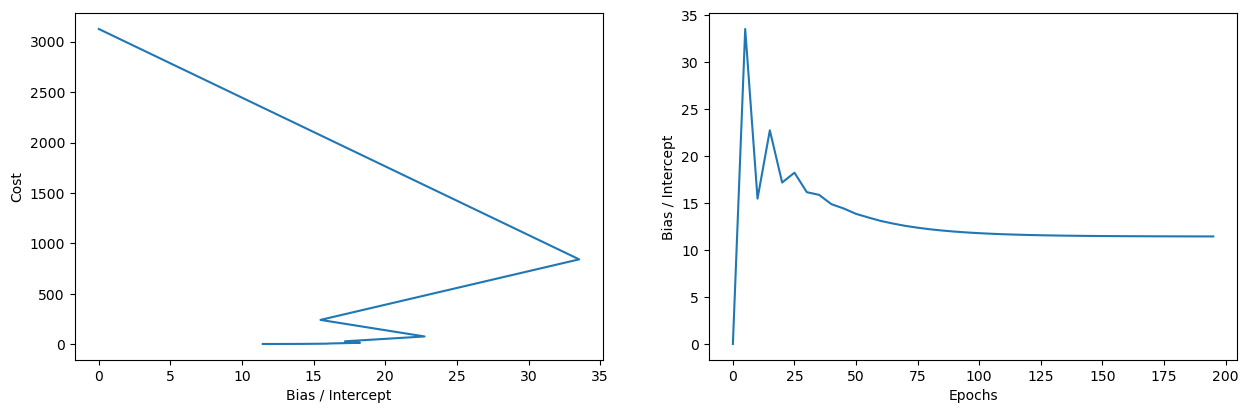

In [26]:
# intercept / bias (c)

fig, ax = plt.subplots(1,2,figsize=(15,4.5))

ax[0].set_ylabel('Cost')
ax[0].set_xlabel('Bias / Intercept')
ax[0].plot(c,loss)

ax[1].set_ylabel('Bias / Intercept')
ax[1].set_xlabel('Epochs')
ax[1].plot(epoch,c);

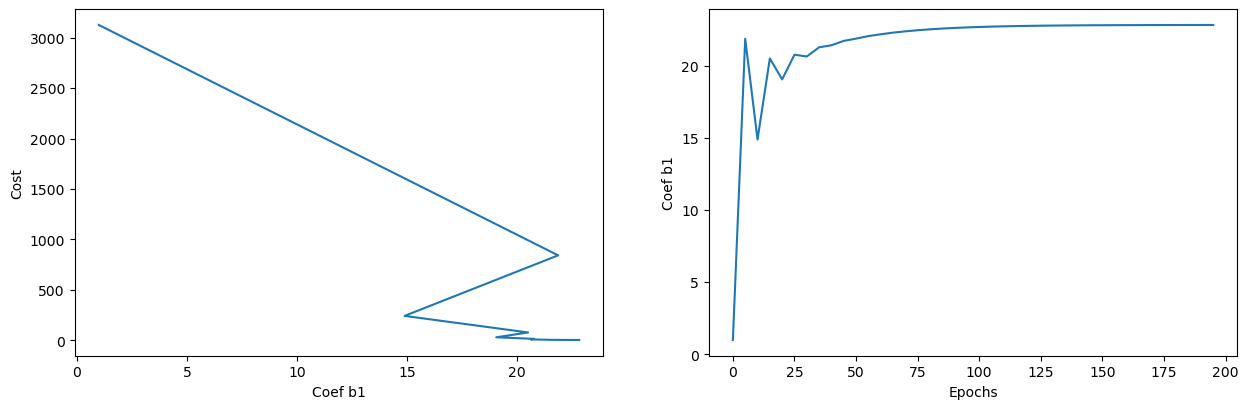

In [27]:
# coefficient - b1 

fig, ax = plt.subplots(1,2,figsize=(15,4.5))

ax[0].set_ylabel('Cost')
ax[0].set_xlabel('Coef b1')
ax[0].plot(b1,loss)

ax[1].set_ylabel('Coef b1')
ax[1].set_xlabel('Epochs')
ax[1].plot(epoch,b1);


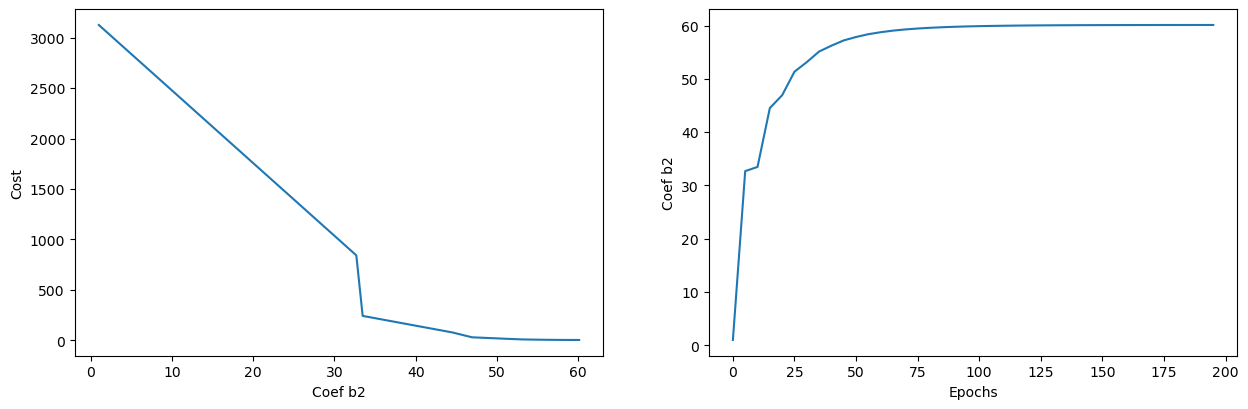

In [28]:
# coefficient - b2

fig, ax = plt.subplots(1,2,figsize=(15,4.5))

ax[0].set_ylabel('Cost')
ax[0].set_xlabel('Coef b2')
ax[0].plot(b2,loss)

ax[1].set_ylabel('Coef b2')
ax[1].set_xlabel('Epochs')
ax[1].plot(epoch,b2);


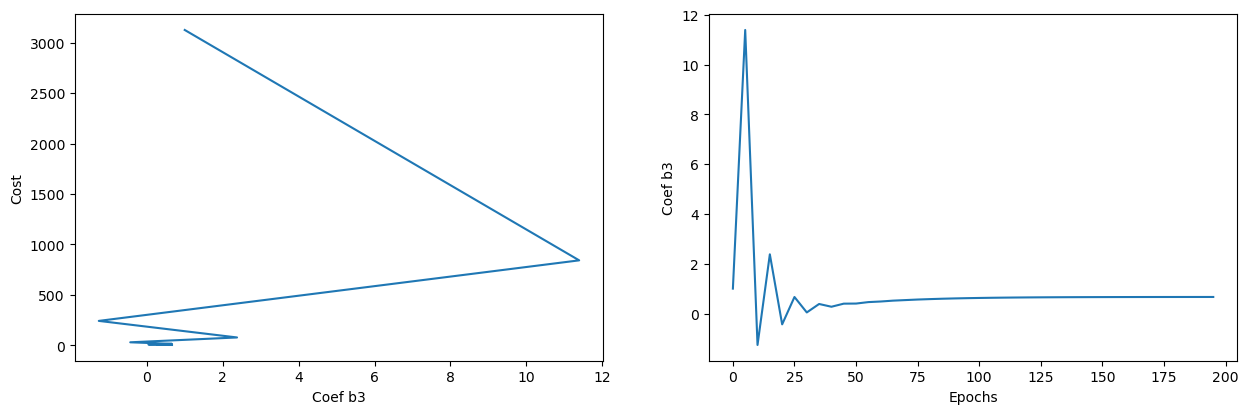

In [29]:
# coefficient - b3

fig, ax = plt.subplots(1,2,figsize=(15,4.5))

ax[0].set_ylabel('Cost')
ax[0].set_xlabel('Coef b3')
ax[0].plot(b3,loss)

ax[1].set_ylabel('Coef b3')
ax[1].set_xlabel('Epochs')
ax[1].plot(epoch,b3);


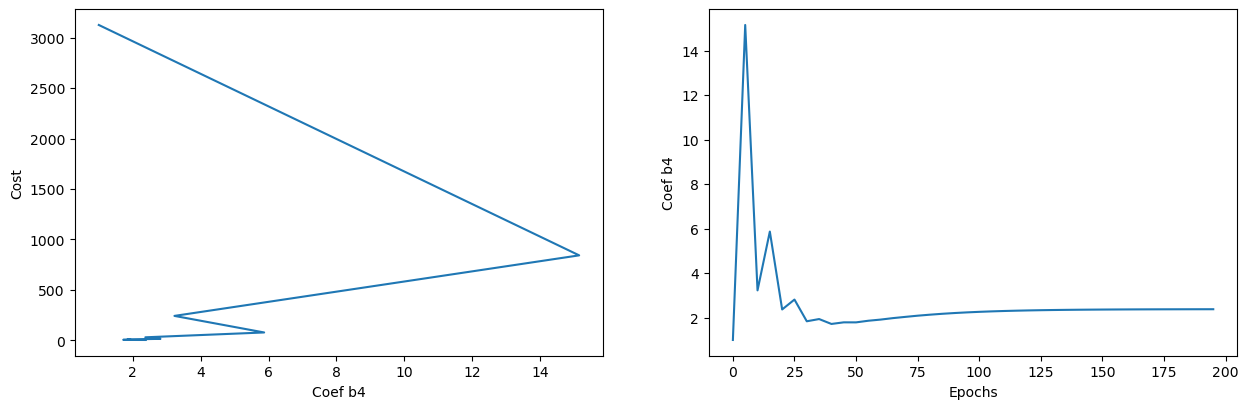

In [30]:
# coefficient - b4

fig, ax = plt.subplots(1,2,figsize=(15,4.5))

ax[0].set_ylabel('Cost')
ax[0].set_xlabel('Coef b4')
ax[0].plot(b4,loss)

ax[1].set_ylabel('Coef b4')
ax[1].set_xlabel('Epochs')
ax[1].plot(epoch,b4);


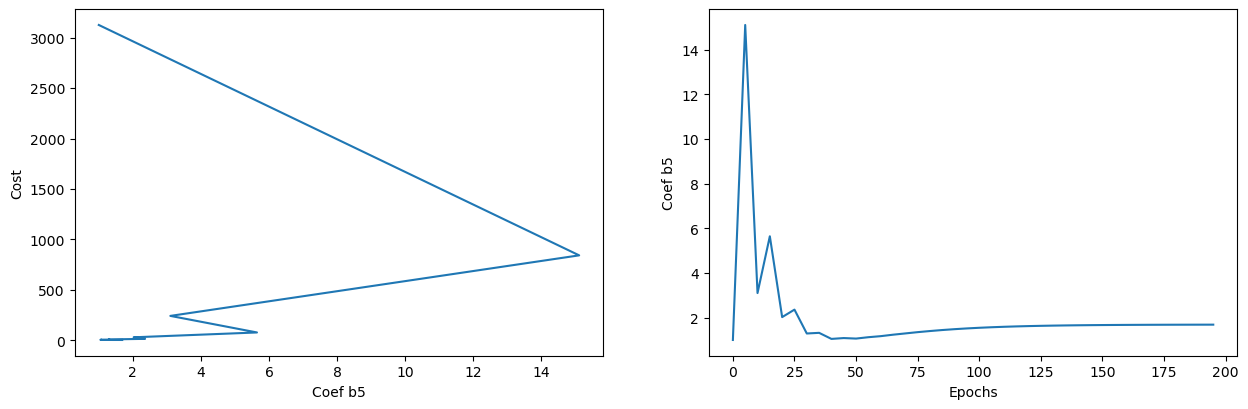

In [31]:
# coefficient - b5

fig, ax = plt.subplots(1,2,figsize=(15,4.5))

ax[0].set_ylabel('Cost')
ax[0].set_xlabel('Coef b5')
ax[0].plot(b5,loss)

ax[1].set_ylabel('Coef b5')
ax[1].set_xlabel('Epochs')
ax[1].plot(epoch,b5);
